Group members: Ani Aloyan, Edgar Oganesian, Albert Hakobyan, and Artur Avagyan 

For the Project, we have retrieved the Hotel Customer Dataset from the Kaggle. The dataset has a wide variety of columns. They allow us to perform RFM analysis and we can also do K-means and KNN clusterings on them to identify the group of the new customer. The many numeric and categorical variables can easily enable us to perform regression analysis. We will also implement ridge and lasso methods to have more accurate predictions. Different visualizations for the relationship of variables will also be done. If any ideas about additional analysis are merged, we will add new columns, but as for now we highly believe our data is more than enough.

In [1]:
import numpy as np
import pandas as pd
import time, warnings
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split 
from lifelines import KaplanMeierFitter
from lifelines.plotting import plot_lifetimes
import random
import statsmodels.api as sm 
from sklearn.metrics import mean_squared_error 
from statsmodels.api import qqplot 
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow  
from scipy.stats import shapiro,ttest_ind
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from stepwise_regression import step_reg
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("HotelCustomersDataset.xlsx")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,83590.000000,79811.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,...,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,41795.500000,45.398028,453.640902,66.196028,298.802087,67.589132,0.002022,0.000634,0.794617,4.649133,...,0.000873,0.002847,0.001711,0.013219,0.352686,0.142541,0.000335,0.003505,0.000120,0.088372
std,24130.498838,16.572368,313.390291,87.758990,372.851892,114.327776,0.066770,0.029545,0.695778,4.567673,...,0.029539,0.053284,0.041326,0.114213,0.477809,0.349606,0.018299,0.059101,0.010937,0.283837
min,1.000000,-11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20898.250000,34.000000,177.000000,0.000000,59.000000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41795.500000,46.000000,397.000000,29.000000,234.000000,38.500000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62692.750000,57.000000,723.000000,103.000000,402.000000,87.675000,0.000000,0.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [221]:
len(df.index) # 83590 observations

83590

In [222]:
df.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')

the columns of Hash will not provide us with any information and will actually become a headache when doing the regression analysis. Thus, we drop the colums 'NameHash', 'DocIDHash. 

In [3]:
df.drop(columns = ['NameHash','DocIDHash'], inplace = True)

In [4]:
df.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [5]:
df.duplicated().sum() # no duplicates 
#df.drop_duplicates(inplace = True)

0

In [226]:
df.isnull().sum() 
#df.info()

ID                         0
Nationality                0
Age                     3779
DaysSinceCreation          0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

Essentially we do not care about the missing age for conducting, for example, rfm analysis. However, additional cleaning has to be done for the regression analysis. Let us also separate the numeric and categorical attributes of the dataset for conducting regression analysis in the future.

In [6]:
df_numeric = df.select_dtypes(exclude=["object"])
#df.numeric
df_categorical = df.select_dtypes(include=["object"])

In [7]:
df_numeric.columns 

Index(['ID', 'Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

Here, we can see that many columns such as SRHighFloor','SRLowFloor','SRAccessibleRoom'are dummies. Ket us also drop ID because it has nothing to do with the regression analysis and is numeric starting from one just due to the nature of the dataset.r'

In [8]:
df_numeric.drop(columns = ["ID"], inplace = True)
df_numeric

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,51.0,150,45,371.0,105.3,1,0,3,8,5,...,0,0,0,0,0,0,0,0,0,0
1,NaN,1095,61,280.0,53.0,0,0,1,10,5,...,0,0,0,0,0,0,0,0,0,0
2,31.0,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,1095,93,240.0,60.0,0,0,1,10,5,...,0,0,0,0,0,0,0,0,0,0
4,51.0,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,54.0,0,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83586,47.0,0,109,327.1,277.5,0,0,1,6,3,...,0,0,0,0,1,0,0,0,0,0
83587,53.0,0,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
83588,85.0,0,109,981.3,9.0,0,0,1,6,3,...,0,0,0,0,0,1,0,0,0,0


Here, we do care about the missing values of age . now let us drop these observations

In [9]:
df_numeric.dropna(inplace = True)

In [10]:
df_numeric

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,51.0,150,45,371.0,105.3,1,0,3,8,5,...,0,0,0,0,0,0,0,0,0,0
2,31.0,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,1095,93,240.0,60.0,0,0,1,10,5,...,0,0,0,0,0,0,0,0,0,0
4,51.0,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,54.0,1095,58,230.0,24.0,0,0,1,4,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,54.0,0,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83586,47.0,0,109,327.1,277.5,0,0,1,6,3,...,0,0,0,0,1,0,0,0,0,0
83587,53.0,0,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
83588,85.0,0,109,981.3,9.0,0,0,1,6,3,...,0,0,0,0,0,1,0,0,0,0


This is pretty much it for te data cleaning. Thanks for bearing with us !

We Start by RFM Analysis

In [233]:
rfm_df = pd.DataFrame()

In [237]:
rfm_df["ID"] = df["ID"]
rfm_df["Recency"] = df["DaysSinceLastStay"]
rfm_df["Recency"] = rfm_df["Recency"].apply(lambda x: max(0, x))
rfm_df["Frequency"] = df["BookingsCheckedIn"]
rfm_df["Monetary"] = df["LodgingRevenue"] + df["OtherRevenue"]

In [238]:
rfm_df

,ID,Recency,Frequency,Monetary
0,1,151,3,476.3
1,2,1100,1,333.0
2,3,0,0,0.0
3,4,1100,1,300.0
4,5,0,0,0.0
...,...,...,...,...
83585,83586,0,0,0.0
83586,83587,3,1,604.6
83587,83588,0,0,0.0
83588,83589,3,1,990.3


In [239]:
rfm_df['R_rank'] = rfm_df['Recency'].rank( ascending=False) 
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

rfm_df['R_rank_norm']=(rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm']=(rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm']=(rfm_df['M_rank']/rfm_df['M_rank'].max())*100

#defining the weight for each score
rfm_df['RFM_Score']=0.3*rfm_df['R_rank_norm']+0.3*rfm_df['F_rank_norm']+0.4*rfm_df['M_rank_norm']
rfm_df=rfm_df.round(0)

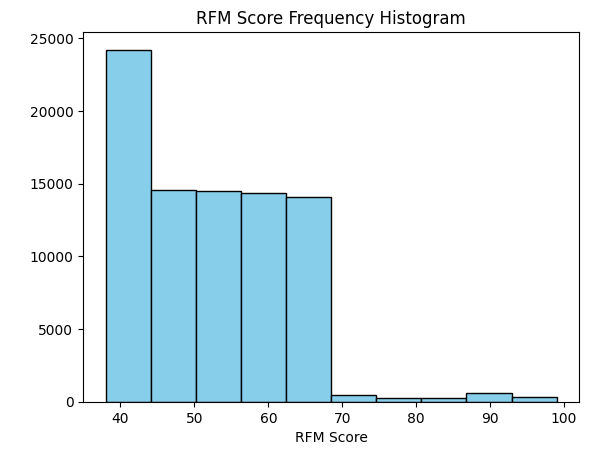

In [240]:
plt.hist(rfm_df["RFM_Score"], bins=10, color='skyblue', edgecolor='black')  
plt.title('RFM Score Frequency Histogram')
plt.xlabel('RFM Score')
plt.ylabel(' ')
plt.show()

Defining the ranges for each customer group 
Leaving (RFM < 40)
Risky customers (55 > RFM > 40)
Potential Loyalist (80 > RFM > 55)
Champions (RFM > 80)

In [241]:
rfm_df["Customer_segment"]=np.where((rfm_df['RFM_Score'] >= 40) & (rfm_df['RFM_Score'] <55),"Risky Customers",
                                    np.where(rfm_df['RFM_Score'] >= 80 ,"Champions",np.where(rfm_df['RFM_Score'] < 40 ,"Leaving","Potential Loyalists"))) 

In [242]:
rfm_df

,ID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,1,151,3,476.0,54628.0,83348.0,61143.0,74.0,100.0,100.0,92.0,Champions
1,2,1100,1,333.0,12.0,51028.0,46942.0,0.0,61.0,61.0,43.0,Risky Customers
2,3,0,0,0.0,73630.0,9960.0,10103.0,100.0,12.0,12.0,38.0,Leaving
3,4,1100,1,300.0,12.0,51028.0,43218.0,0.0,61.0,61.0,43.0,Risky Customers
4,5,0,0,0.0,73630.0,9960.0,10103.0,100.0,12.0,12.0,38.0,Leaving
...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,0,0,0.0,73630.0,9960.0,10103.0,100.0,12.0,12.0,38.0,Leaving
83586,83587,3,1,605.0,63620.0,51028.0,69110.0,86.0,61.0,61.0,69.0,Potential Loyalists
83587,83588,0,0,0.0,73630.0,9960.0,10103.0,100.0,12.0,12.0,38.0,Leaving
83588,83589,3,1,990.0,63620.0,51028.0,78459.0,86.0,61.0,61.0,69.0,Potential Loyalists


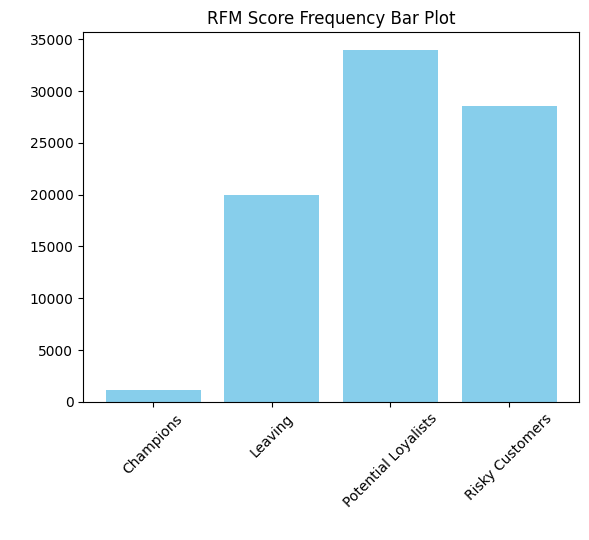

In [243]:
score_counts = rfm_df["Customer_segment"].value_counts().sort_index()
plt.bar(score_counts.index, score_counts.values, color='skyblue')
plt.title('RFM Score Frequency Bar Plot')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(rotation=45)
plt.show()

In [246]:
df_rfm_merged = df.merge(rfm_df, on='ID')

In [247]:
df_rfm_merged

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,3,476.0,54628.0,83348.0,61143.0,74.0,100.0,100.0,92.0,Champions
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,1,333.0,12.0,51028.0,46942.0,0.0,61.0,61.0,43.0,Risky Customers
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0.0,73630.0,9960.0,10103.0,100.0,12.0,12.0,38.0,Leaving
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,1,300.0,12.0,51028.0,43218.0,0.0,61.0,61.0,43.0,Risky Customers
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0.0,73630.0,9960.0,10103.0,100.0,12.0,12.0,38.0,Leaving
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,ITA,54.0,0,0,0.0,0.0,0,0,0,...,0,0.0,73630.0,9960.0,10103.0,100.0,12.0,12.0,38.0,Leaving
83586,83587,IRL,47.0,0,109,327.1,277.5,0,0,1,...,1,605.0,63620.0,51028.0,69110.0,86.0,61.0,61.0,69.0,Potential Loyalists
83587,83588,IRL,53.0,0,0,0.0,0.0,0,0,0,...,0,0.0,73630.0,9960.0,10103.0,100.0,12.0,12.0,38.0,Leaving
83588,83589,IRL,85.0,0,109,981.3,9.0,0,0,1,...,1,990.0,63620.0,51028.0,78459.0,86.0,61.0,61.0,69.0,Potential Loyalists


In [23]:
#df_rfm_merged.columns

In [248]:
X=df_rfm_merged[["Recency","Frequency","Monetary"]]
y = df_rfm_merged["Customer_segment"]
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42) 
  
knn = KNeighborsClassifier(n_neighbors=4) 
knn.fit(X_train, y_train) 
accuracy = accuracy_score(y_test, knn.predict(X_test))
print(f'Accuracy of the model: {accuracy * 100:.2f}%')

Accuracy of the model: 97.92%


In [249]:
df_km = df_rfm_merged[['R_rank_norm','F_rank_norm','M_rank_norm']]

Choosing the optimal number of clusters using the elbow method

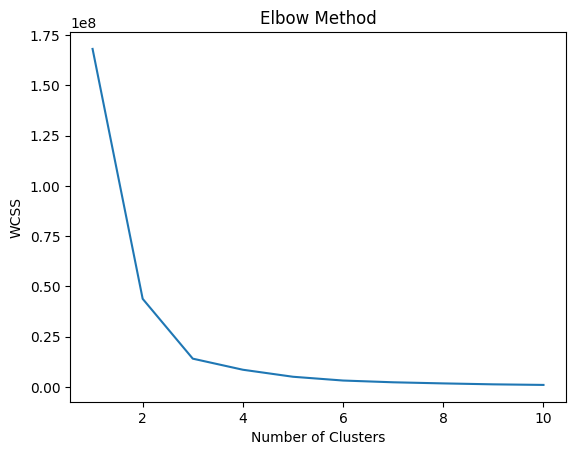

In [250]:
wcss= [] 
for i in range(1,11):
    k_means = KMeans(n_clusters=i, init="k-means++")
    k_means.fit(df_km)a
    wcss.append(k_means.inertia_)

plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [182]:
df_km

,R_rank_norm,F_rank_norm,M_rank_norm
0,74.0,100.0,100.0
1,0.0,61.0,61.0
2,100.0,12.0,12.0
3,0.0,61.0,61.0
4,100.0,12.0,12.0
...,...,...,...
83585,100.0,12.0,12.0
83586,86.0,61.0,61.0
83587,100.0,12.0,12.0
83588,86.0,61.0,61.0


In [254]:
model_km3 = KMeans(n_clusters=3, init='k-means++',random_state=42)
y_means_3 = model_km3.fit_predict(df_km)
model_km2 = KMeans(n_clusters=2, init='k-means++',random_state=42)
y_means_2 = model_km2.fit_predict(df_km)


In [255]:
silhouette_score(df_km,y_means_3)
silhouette_score(df_km,y_means_2)

0.7450458392632395

In [257]:
df_km["Cluster"] = y_means_2
df_km['Cluster'].value_counts()

Cluster
0    63670
1    19920
Name: count, dtype: int64

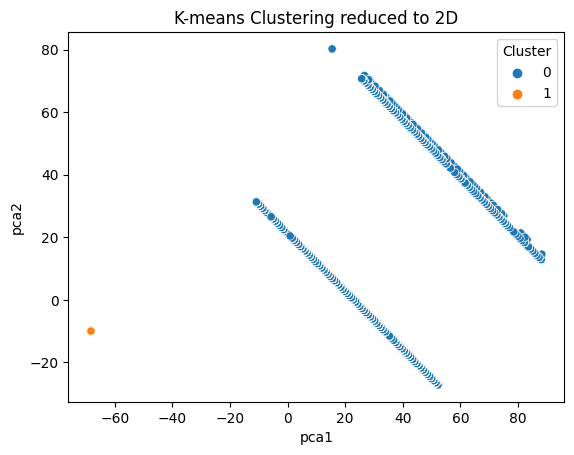

In [258]:
from sklearn.decomposition import PCA
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df_km)
ress = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df_km['Cluster'], data=ress)
plt.title('K-means Clustering reduced to 2D')
plt.show()

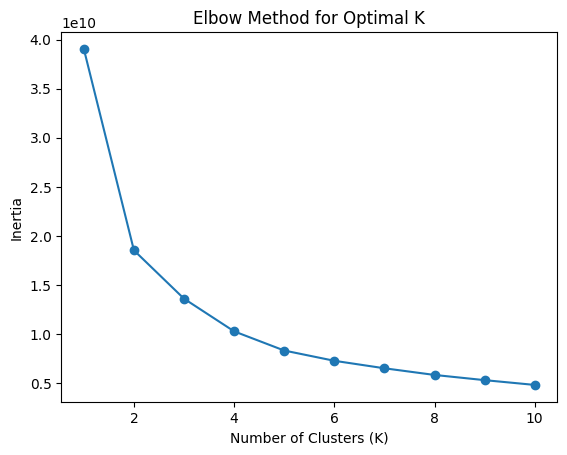

In [262]:
features = df[['ID','Age', 'DaysSinceCreation', 'AverageLeadTime',
               'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
               'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights',
               'RoomNights', 'DaysSinceLastStay', 'DaysSinceFirstStay']]
features.dropna(inplace=True)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features.iloc[:, 1:])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [261]:
kmeans = KMeans(n_clusters=2, random_state=42)

df_km_merged = df.merge(features, on='ID')
df_km_merged['Cluster'] = kmeans.fit_predict(features.iloc[:, 1:])
df_km_merged['Cluster'].value_counts()

Cluster
0    43214
1    36597
Name: count, dtype: int64

In [414]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_means_km2 = kmeans.fit_predict(features.iloc[:, 1:])

In [416]:
silhouette_score(features,y_means_km2)

0.33473677976964933

In [260]:
silhouette_score(features,df_km_merged['Cluster'])

0.5867166993932892

We proceed with Linear Regression

In [29]:
df_numeric.describe()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,75919.00000,78996.000000,78996.000000,78996.000000,78996.000000,78996.000000,78996.000000,78996.000000,78996.000000,78996.000000,...,78996.000000,78996.000000,78996.000000,78996.000000,78996.000000,78996.000000,78996.000000,78996.000000,78996.000000,78996.000000
mean,45.48316,461.193212,67.163591,311.601469,70.466427,0.002139,0.000671,0.822434,4.846410,2.451858,...,0.000924,0.003013,0.001810,0.013659,0.359373,0.139045,0.000354,0.003709,0.000127,0.092524
std,16.41571,313.277897,86.471426,377.543541,116.486790,0.068682,0.030392,0.696798,4.590746,2.292962,...,0.030385,0.054807,0.042508,0.116071,0.479820,0.345996,0.018824,0.060789,0.011251,0.289766
min,-11.00000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.00000,182.000000,1.000000,87.750000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.00000,417.000000,32.000000,242.000000,42.000000,0.000000,0.000000,1.000000,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,57.00000,732.000000,105.000000,414.900000,90.500000,0.000000,0.000000,1.000000,8.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,122.00000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,185.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [287]:
df_numeric.corr().abs() 

,Age,DaysSinceCreation,AverageLeadTime,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
Age,1.000000,0.129327,0.252229,0.004525,0.006748,0.133286,0.112852,0.132383,0.162978,0.163980,...,0.007231,0.018872,0.010737,0.120428,0.003195,0.014357,0.012388,0.009729,0.010536,0.014360
DaysSinceCreation,0.129327,1.000000,0.137880,0.016982,0.012308,0.275261,0.244961,0.243940,0.907308,0.911349,...,0.006925,0.010403,0.004462,0.040040,0.028008,0.021383,0.004135,0.012306,0.011013,0.049512
AverageLeadTime,0.252229,0.137880,1.000000,0.014479,0.011388,0.246543,0.351832,0.329748,0.245581,0.241844,...,0.000725,0.006297,0.008410,0.041132,0.018059,0.078344,0.000051,0.000047,0.006451,0.007298
BookingsCanceled,0.004525,0.016982,0.014479,1.000000,0.328435,0.469282,0.086955,0.194487,0.011095,0.021245,...,0.024859,0.001512,0.001180,0.003254,0.018433,0.008181,0.000523,0.004701,0.000313,0.005529
BookingsNoShowed,0.006748,0.012308,0.011388,0.328435,1.000000,0.288780,0.064337,0.149811,0.005512,0.013280,...,0.000603,0.001102,0.000859,0.002371,0.012524,0.002017,0.000381,0.001219,0.000228,0.003358
BookingsCheckedIn,0.133286,0.275261,0.246543,0.469282,0.288780,1.000000,0.489291,0.654642,0.383837,0.427928,...,0.011337,0.005636,0.000173,0.037727,0.007472,0.026399,0.000773,0.009738,0.004750,0.009283
PersonsNights,0.112852,0.244961,0.351832,0.086955,0.064337,0.489291,1.000000,0.871843,0.373218,0.382465,...,0.006008,0.015506,0.013989,0.012428,0.035188,0.001053,0.001232,0.014743,0.002192,0.031055
RoomNights,0.132383,0.243940,0.329748,0.194487,0.149811,0.654642,0.871843,1.000000,0.369923,0.390723,...,0.006870,0.014834,0.012392,0.034539,0.019723,0.027893,0.002273,0.015562,0.001917,0.021001
DaysSinceLastStay,0.162978,0.907308,0.245581,0.011095,0.005512,0.383837,0.373218,0.369923,1.000000,0.995396,...,0.005772,0.009304,0.003019,0.047134,0.021616,0.020240,0.002571,0.012857,0.010668,0.031693
DaysSinceFirstStay,0.163980,0.911349,0.241844,0.021245,0.013280,0.427928,0.382465,0.390723,0.995396,1.000000,...,0.007949,0.009620,0.003260,0.046872,0.019346,0.021470,0.002685,0.014084,0.010717,0.032759


<Axes: >

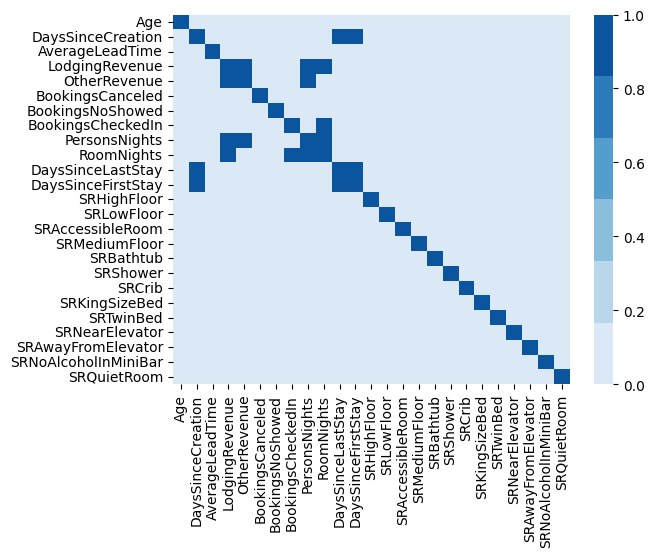

In [11]:
import seaborn as sns
color_palettemap = sns.color_palette("Blues")
sns.heatmap(df_numeric.corr().abs() > 0.5, annot=False, cmap = color_palettemap)

In [12]:
df_numeric.drop(columns = ["RoomNights"], inplace = True)
df_numeric.drop(columns = ["DaysSinceLastStay"], inplace = True)

<Axes: >

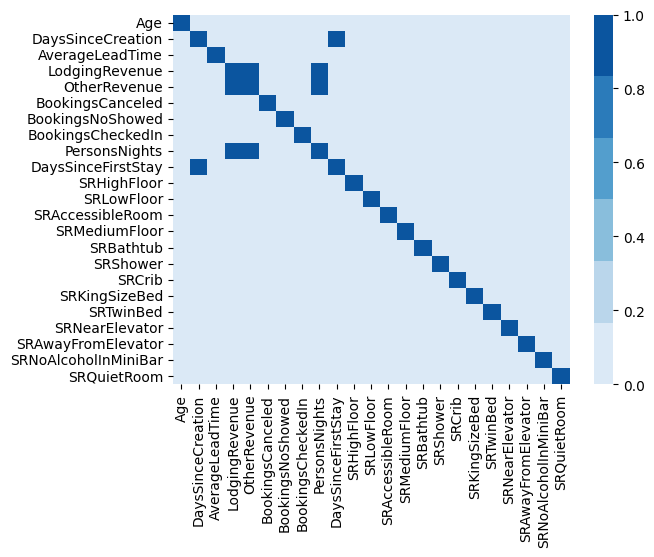

In [13]:
color_palettemap = sns.color_palette("Blues")
sns.heatmap(df_numeric.corr().abs() > 0.5, annot=False, cmap = color_palettemap)

In [14]:
df_lm = pd.concat((df_numeric, pd.get_dummies(df_categorical, drop_first=True,dtype = "uint8")), axis=1)
df_lm.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,DaysSinceFirstStay,...,Nationality_ZWE,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,51.0,150.0,45.0,371.0,105.3,1.0,0.0,3.0,8.0,1074.0,...,0,0,0,0,0,1,0,0,0,0
2,31.0,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0,0,0,1,0,0,0,0,0,1
3,60.0,1095.0,93.0,240.0,60.0,0.0,0.0,1.0,10.0,1100.0,...,0,0,0,1,0,0,0,0,0,1
4,51.0,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0,0,0,1,0,0,0,0,0,1
5,54.0,1095.0,58.0,230.0,24.0,0.0,0.0,1.0,4.0,1097.0,...,0,0,0,1,0,0,0,0,1,0


In [15]:
df_lm.dropna(inplace = True)
df_x = df_lm.drop(columns=['LodgingRevenue', 'OtherRevenue'])
df_x= sm.add_constant(df_x)
df_y = df_lm["LodgingRevenue"] + df_lm["OtherRevenue"]

In [16]:
df_x

,const,Age,DaysSinceCreation,AverageLeadTime,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,DaysSinceFirstStay,SRHighFloor,...,Nationality_ZWE,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,1.0,51.0,150.0,45.0,1.0,0.0,3.0,8.0,1074.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,1.0,31.0,1095.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0,0,0,1,0,0,0,0,0,1
3,1.0,60.0,1095.0,93.0,0.0,0.0,1.0,10.0,1100.0,0.0,...,0,0,0,1,0,0,0,0,0,1
4,1.0,51.0,1095.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0,0,0,1,0,0,0,0,0,1
5,1.0,54.0,1095.0,58.0,0.0,0.0,1.0,4.0,1097.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,1.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0,0,0,1,0,0,0,0,1,0
83586,1.0,47.0,0.0,109.0,0.0,0.0,1.0,6.0,3.0,0.0,...,0,0,0,1,0,0,0,0,1,0
83587,1.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0,0,0,1,0,0,0,0,1,0
83588,1.0,85.0,0.0,109.0,0.0,0.0,1.0,6.0,3.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [20]:
model_linear= sm.OLS(df_y,df_x)
results=model_linear.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     377.0
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:08:11   Log-Likelihood:            -5.7065e+05
No. Observations:               79811   AIC:                         1.142e+06
Df Residuals:                   79593   BIC:                         1.144e+06
Df Model:                         217                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [21]:
predicted = results.predict(df_x)
print("MSE: ", mean_squared_error(df_y, predicted))

MSE:  95042.5893939938


Checking the LINE Assumptions as well

In [22]:
rnames = ["fstat", "p-value"]
rainbow = linear_rainbow(results)
print(list(zip(rnames, rainbow)))

[('fstat', 1.071063437557789), ('p-value', 3.749374384779637e-12)]


In [39]:
from scipy.stats import shapiro,ttest_ind
residuals = results.resid
snames = ['The test statistic', 'p-value']
shapiro = shapiro(residuals)
print(list(zip(snames, shapiro)))

[('The test statistic', 0.5528282523155212), ('p-value', 0.0)]


In [319]:
len(df_x.columns)

218

In [321]:
forwardselect = step_reg.forward_regression(df_x, df_y, 0.05,verbose=True)
forwardselect

Add  BookingsCheckedIn              with p-value 0.0
Add  PersonsNights                  with p-value 0.0
Add  MarketSegment_Travel Agent/Operator with p-value 1.25448e-238
Add  DaysSinceCreation              with p-value 7.73238e-136
Add  const                          with p-value 2.90482e-242
Add  BookingsCanceled               with p-value 2.27844e-113
Add  MarketSegment_Complementary    with p-value 2.48996e-77
Add  MarketSegment_Other            with p-value 3.28055e-45
Add  Nationality_NAM                with p-value 5.02831e-40
Add  SRKingSizeBed                  with p-value 9.17935e-22
Add  SRQuietRoom                    with p-value 1.6469e-21
Add  Nationality_PRT                with p-value 2.60466e-19
Add  Nationality_BRA                with p-value 8.54893e-14
Add  Nationality_CAN                with p-value 2.32379e-12
Add  Nationality_EST                with p-value 2.08875e-11
Add  Nationality_SWE                with p-value 6.65531e-10
Add  Nationality_AGO            

['BookingsCheckedIn',
 'PersonsNights',
 'MarketSegment_Travel Agent/Operator',
 'DaysSinceCreation',
 'const',
 'BookingsCanceled',
 'MarketSegment_Complementary',
 'MarketSegment_Other',
 'Nationality_NAM',
 'SRKingSizeBed',
 'SRQuietRoom',
 'Nationality_PRT',
 'Nationality_BRA',
 'Nationality_CAN',
 'Nationality_EST',
 'Nationality_SWE',
 'Nationality_AGO',
 'Nationality_NLD',
 'Nationality_EGY',
 'DistributionChannel_Electronic Distribution',
 'Nationality_DNK',
 'Nationality_MLI',
 'Nationality_BEL',
 'Nationality_CZE',
 'Nationality_SMR',
 'Nationality_NOR',
 'BookingsNoShowed',
 'Nationality_ARE',
 'DistributionChannel_Direct',
 'DistributionChannel_Travel Agent/Operator',
 'MarketSegment_Corporate',
 'MarketSegment_Groups',
 'MarketSegment_Direct',
 'Nationality_IRQ',
 'Nationality_COD',
 'Nationality_TWN',
 'Nationality_MAR',
 'SRBathtub',
 'Nationality_JPN',
 'Nationality_KOR',
 'Nationality_GNB',
 'Nationality_MEX',
 'Nationality_AND',
 'Nationality_ARG']

In [24]:
df_x_new = df_x[['BookingsCheckedIn',
 'PersonsNights',
 'MarketSegment_Travel Agent/Operator',
 'DaysSinceCreation',
 'const',
 'BookingsCanceled',
 'MarketSegment_Complementary',
 'MarketSegment_Other',
 'Nationality_NAM',
 'SRKingSizeBed',
 'SRQuietRoom',
 'Nationality_PRT',
 'Nationality_BRA',
 'Nationality_CAN',
 'Nationality_EST',
 'Nationality_SWE',
 'Nationality_AGO',
 'Nationality_NLD',
 'Nationality_EGY',
 'DistributionChannel_Electronic Distribution',
 'Nationality_DNK',
 'Nationality_MLI',
 'Nationality_BEL',
 'Nationality_CZE',
 'Nationality_SMR',
 'Nationality_NOR',
 'BookingsNoShowed',
 'Nationality_ARE',
 'DistributionChannel_Direct',
 'DistributionChannel_Travel Agent/Operator',
 'MarketSegment_Corporate',
 'MarketSegment_Groups',
 'MarketSegment_Direct',
 'Nationality_IRQ',
 'Nationality_COD',
 'Nationality_TWN',
 'Nationality_MAR',
 'SRBathtub',
 'Nationality_JPN',
 'Nationality_KOR',
 'Nationality_GNB',
 'Nationality_MEX',
 'Nationality_AND',
 'Nationality_ARG']]

In [25]:
len(df_x_new.columns)

44

In [40]:
model_linear_new= sm.OLS(df_y,df_x_new)
results=model_linear_new.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     1901.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:13:54   Log-Likelihood:            -5.7071e+05
No. Observations:               79811   AIC:                         1.142e+06
Df Residuals:                   79767   BIC:                         1.142e+06
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [41]:
rnames = ["fstat", "p-value"]
rainbow = linear_rainbow(results)
print(list(zip(rnames, rainbow)))

[('fstat', 1.0706071675186746), ('p-value', 4.815872325270434e-12)]


In [42]:
from scipy.stats import shapiro,ttest_ind
residuals = results.resid
snames = ['The test statistic', 'p-value']
shapiro = shapiro(residuals)
print(list(zip(snames, shapiro)))

[('The test statistic', 0.5528282523155212), ('p-value', 0.0)]


In [43]:
predicted_new = results_new.predict(df_x_new)
print("MSE Forward Checking: ", mean_squared_error(df_y, predicted_new))

MSE Forward Checking:  95184.18524908346


In [360]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas = alphas,cv = 10) 
ridgecv.fit(df_x, df_y) 
print("alpha", ridgecv.alpha_) 
ridge = Ridge(alpha = ridgecv.alpha_)
lassocv = LassoCV(alphas = alphas,cv = 10) 
lassocv.fit(df_x, df_y)
print("alpha", lassocv.alpha_) 
lasso = Lasso(alpha = lassocv.alpha_)
res = lasso.fit(df_x, df_y)

alpha 16.372745814388658
alpha 0.10772173450159389


In [367]:
from sklearn.metrics import r2_score
y_pred = res.predict(df_x)
r_squared = r2_score(df_y, y_pred)
print(f'R-squared Lasso: {r_squared:.4f}')

R-squared Lasso: 0.5046


In [366]:
print("MSE Lasso: ", mean_squared_error(df_y, y_pred))

MSE Lasso:  95475.57906613275


In [369]:
res = ridge.fit(df_x, df_y)
y_pred = res.predict(df_x)
r_squared = r2_score(df_y, y_pred)
print(f'R-squared Ridge: {r_squared:.4f}')

R-squared Ridge: 0.5059


In [370]:
print("MSE Ridge: ", mean_squared_error(df_y, y_pred))

MSE Ridge:  95227.04326401782


In [41]:
cancellation_rate_by_country = df.groupby('Nationality')['BookingsCanceled'].mean().mul(100).round(2)
top_10_cancellation_countries = cancellation_rate_by_country.nlargest(10)
print("Top 10 countries by cancellation rate:")
print(top_10_cancellation_countries)

Top 10 countries by cancellation rate:
Nationality
NAM    14.29
GRC     2.52
CYP     1.75
ZAF     1.56
DZA     1.28
PRT     1.13
SWE     0.16
ESP     0.14
CAN     0.13
POL     0.13
Name: BookingsCanceled, dtype: float64


In [92]:
top10_withut_nam = cancellation_rate_by_country.nlargest(11)[1:]

In [93]:
top10_withut_nam

Nationality
GRC    2.52
CYP    1.75
ZAF    1.56
DZA    1.28
PRT    1.13
SWE    0.16
ESP    0.14
CAN    0.13
POL    0.13
BEL    0.10
Name: BookingsCanceled, dtype: float64

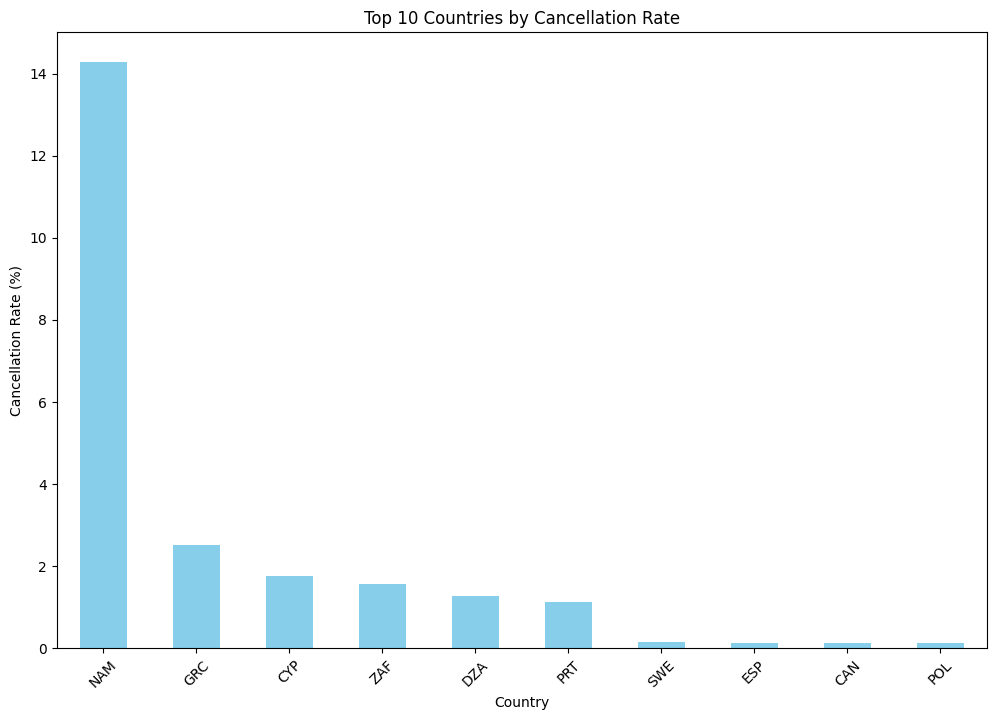

In [42]:
plt.figure(figsize=(12, 8))
top_10_cancellation_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Cancellation Rate')
plt.xlabel('Country')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)
plt.show()

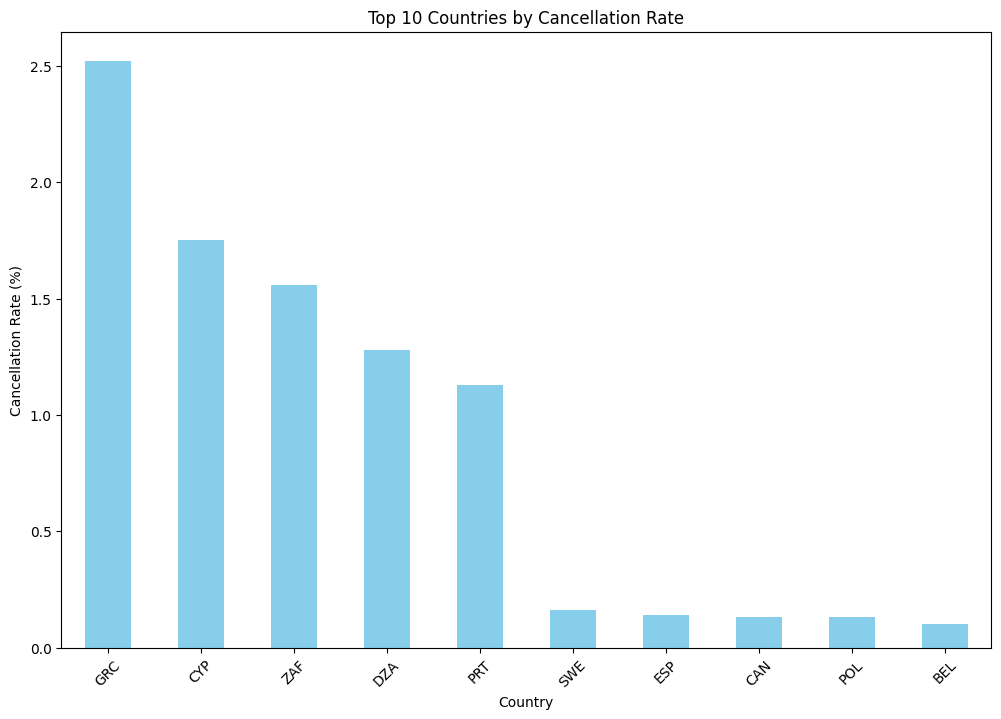

In [94]:
plt.figure(figsize=(12, 8))
top10_withut_nam.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Cancellation Rate')
plt.xlabel('Country')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [43]:
np.random.seed(123)
df['Rating'] = np.random.randint(0, 11, size=len(df))

In [372]:
len(['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'])

13

Net Promoter Score (NPS)

In [45]:
promoters = df[df['Rating'] >= 9].shape[0]
detractors = df[df['Rating'] <= 6].shape[0]
total_responses = df.shape[0]

nps = (promoters - detractors) / total_responses * 100
print("Net Promoter Score (NPS):", nps, "%") 

Net Promoter Score (NPS): -45.52219164971887 %


In [373]:
df['Account_Deleted'] = [random.choice(['Yes', 'No']) for _ in range(len(df))]

In [374]:
df

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Account_Deleted
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,Yes
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Yes
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yes
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,No
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,ITA,54.0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yes
83586,83587,IRL,47.0,0,109,327.1,277.5,0,0,1,...,0,0,0,1,0,0,0,0,0,No
83587,83588,IRL,53.0,0,0,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,No
83588,83589,IRL,85.0,0,109,981.3,9.0,0,0,1,...,0,0,0,0,1,0,0,0,0,Yes


In [375]:
df['Account_Deleted'] = df['Account_Deleted'].replace({'Yes': 1, 'No': 0})

In [376]:
kmf = KaplanMeierFitter()
kmf.fit(durations=df["DaysSinceCreation"], event_observed=df['Account_Deleted'])
event_table = kmf.event_table
event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,97,53,44,83590,83590
1.0,121,52,69,0,83493
2.0,196,92,104,0,83372
3.0,111,59,52,0,83176
4.0,89,35,54,0,83065
...,...,...,...,...,...
1091.0,99,56,43,0,378
1092.0,16,5,11,0,279
1093.0,103,48,55,0,263


In [ ]:
ax = kmf.plot()

censored_data = df[df['Account_Deleted'] == 0]  

survival_prob = kmf.predict(censored_data['DaysSinceCreation'])

for time, prob in zip(censored_data['DaysSinceCreation'], survival_prob):
    plt.scatter(time, prob, marker='x', color='red')

median_survival_time = kmf.median_survival_time_
plt.axvline(x=median_survival_time, color='green', linestyle='--', label=f"Median Survival Time: {median_survival_time:.2f} units")

plt.title("Kaplan-Meier Survival Curve with Censored Data Points and Median Survival Time")
plt.xlabel("Time")
plt.ylabel("Survival probability")
plt.legend()
plt.show()

In [378]:
total_revenue = df['LodgingRevenue'] + df['OtherRevenue']
avg_revenue_per_booking = total_revenue / (df['BookingsCheckedIn'] + df['BookingsNoShowed'])
avg_revenue_per_booking = avg_revenue_per_booking.fillna(0)

In [379]:
avg_revenue_per_booking.round(2)

0        158.77
1        333.00
2          0.00
3        300.00
4          0.00
          ...  
83585      0.00
83586    604.60
83587      0.00
83588    990.30
83589      0.00
Length: 83590, dtype: float64

In [79]:
print((avg_revenue_per_booking == 0).sum())

20205


In [83]:
print((avg_revenue_per_booking > 2000).sum())

771


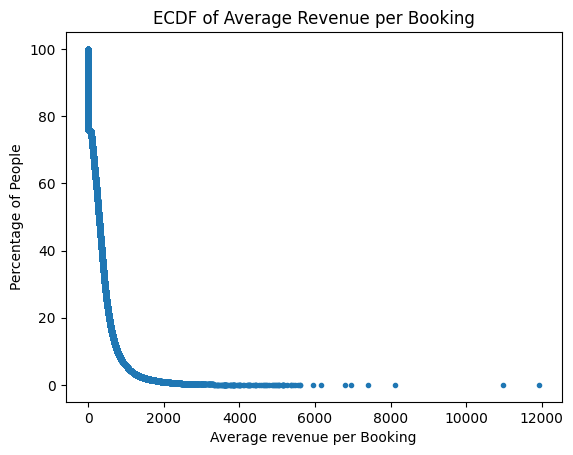

In [89]:
sorted_avg_revenue = np.sort(avg_revenue_per_booking)
percentiles = np.arange(0, 100, 100/len(sorted_avg_revenue))
plt.plot(sorted_avg_revenue, 100 - percentiles, marker='.', linestyle='none')
plt.title('ECDF of Average Revenue per Booking')
plt.xlabel('Average revenue per Booking')
plt.ylabel('Percentage of People')
plt.show()

In [395]:
room_features = df.iloc[:, 16: 29]
preferred_features = room_features.sum().sort_values(ascending=False)

In [396]:
preferred_features

SRKingSizeBed           29481
SRTwinBed               11915
SRQuietRoom              7387
SRHighFloor              3969
SRCrib                   1105
SRAwayFromElevator        293
SRBathtub                 238
SRShower                  143
SRLowFloor                118
SRMediumFloor              73
SRNearElevator             28
SRAccessibleRoom           21
SRNoAlcoholInMiniBar       10
dtype: int64

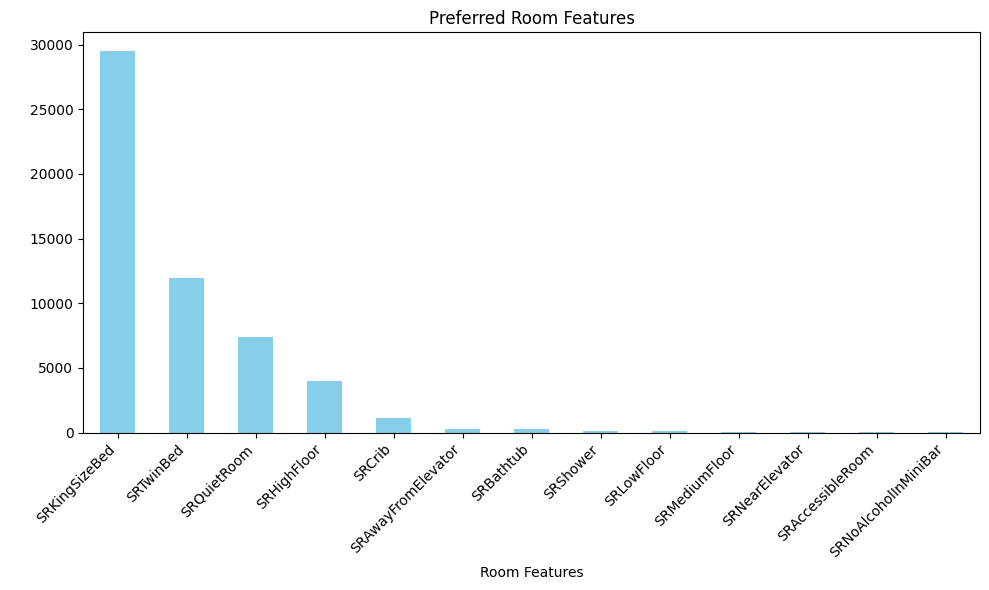

In [397]:
plt.figure(figsize=(10, 6))
preferred_features.plot(kind='bar', color='skyblue')
plt.xlabel('Room Features')
plt.ylabel(' ')
plt.title('Preferred Room Features')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility of feature names
plt.tight_layout()
plt.show()

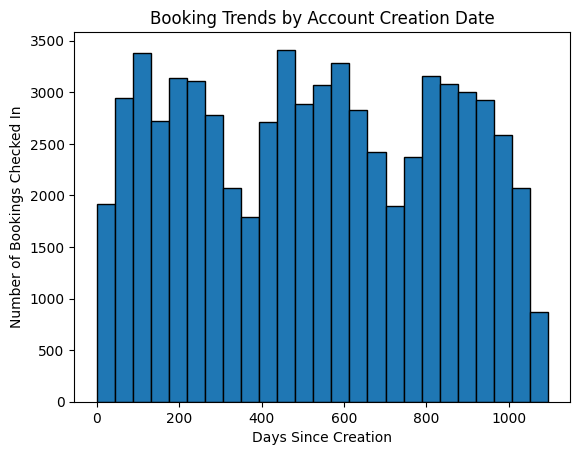

In [413]:
plt.hist(df['DaysSinceCreation'], bins=25, weights=df['BookingsCheckedIn'], edgecolor='black')
plt.xlabel('Days Since Creation')
plt.ylabel('Number of Bookings Checked In')
plt.title('Booking Trends by Account Creation Date')
plt.show()